# Maximizing ROI: Analyzing the Impact of Ad Spend on Website Performance

This project simulates a marketing analytics scenario for a small business. Our goal is to examine how advertising spend impacts sessions, conversions, and revenue over time.

We'll explore:

- Seasonal performance patterns
- Return on ad spend (ROAS)
- Efficiency of conversion relative to ad investment 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/seo_ad_performance_dataset.csv")
df["Month"] = pd.Categorical(df["Month"], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
df = df.sort_values("Month")
df.head(12)


,Month,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($)
0,Jan,5174,10498,2.53,265,15429.98
1,Feb,5507,13399,2.30,308,13895.64
2,Mar,2860,6579,2.84,186,7802.99
3,Apr,3294,7754,2.04,158,10817.72
4,May,3130,6292,2.30,144,9931.53
5,Jun,3095,7690,2.42,186,11950.86
6,Jul,5772,13946,2.58,359,17640.69
7,Aug,5092,10724,3.13,335,14381.60
8,Sep,3638,7606,2.14,162,9805.37
9,Oct,4169,8720,2.67,232,12343.46


In [24]:
clicks = round(df['Conversions']/(df['Conversion Rate (%)']/100))
df['Clicks']=clicks
df.head(12)

,Month,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($),Clicks
0,Jan,5174,10498,2.53,265,15429.98,10474.0
1,Feb,5507,13399,2.30,308,13895.64,13391.0
2,Mar,2860,6579,2.84,186,7802.99,6549.0
3,Apr,3294,7754,2.04,158,10817.72,7745.0
4,May,3130,6292,2.30,144,9931.53,6261.0
5,Jun,3095,7690,2.42,186,11950.86,7686.0
6,Jul,5772,13946,2.58,359,17640.69,13915.0
7,Aug,5092,10724,3.13,335,14381.60,10703.0
8,Sep,3638,7606,2.14,162,9805.37,7570.0
9,Oct,4169,8720,2.67,232,12343.46,8689.0


In [30]:
#Return On Ads Spent per $1
roas = round(((df['Revenue ($)']/df['Ad Spend ($)'])*100)/100, 2)
df['ROAS'] = roas
df.head(12)

,Month,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($),Clicks,ROAS
0,Jan,5174,10498,2.53,265,15429.98,10474.0,2.98
1,Feb,5507,13399,2.30,308,13895.64,13391.0,2.52
2,Mar,2860,6579,2.84,186,7802.99,6549.0,2.73
3,Apr,3294,7754,2.04,158,10817.72,7745.0,3.28
4,May,3130,6292,2.30,144,9931.53,6261.0,3.17
5,Jun,3095,7690,2.42,186,11950.86,7686.0,3.86
6,Jul,5772,13946,2.58,359,17640.69,13915.0,3.06
7,Aug,5092,10724,3.13,335,14381.60,10703.0,2.82
8,Sep,3638,7606,2.14,162,9805.37,7570.0,2.70
9,Oct,4169,8720,2.67,232,12343.46,8689.0,2.96


In [31]:
file_path = '../output/seo_performance.csv'
df.to_csv(file_path, index=False)

## 📊 Data Overview

Let's get a quick summary of the data types and basic stats.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month                12 non-null     category
 1   Ad Spend ($)         12 non-null     int64   
 2   Sessions             12 non-null     int64   
 3   Conversion Rate (%)  12 non-null     float64 
 4   Conversions          12 non-null     int64   
 5   Revenue ($)          12 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 1016.0 bytes


In [4]:
df.describe()

,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($)
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3952.916667,8820.000000,2.470000,218.416667,11501.710833
std,1145.050095,2756.317174,0.362567,79.575531,3416.526268
min,2466.000000,5307.000000,1.880000,137.000000,6505.510000
25%,3121.250000,7138.500000,2.260000,155.750000,9304.775000
50%,3466.000000,7722.000000,2.475000,186.000000,11384.290000
75%,5112.500000,10554.500000,2.705000,275.750000,14017.130000
max,5772.000000,13946.000000,3.130000,359.000000,17640.690000


In [ ]:
total_adspent = df['Ad Spend ($)'].sum()
total_session = df['Sessions'].sum()
total_conversionrate = df['Conversion Rate (%)'].sum()
total_conversion = df['Conversions'].sum()
total_revenue = df['Revenue ($)'].sum()

print(
    f"Total Ads Spent($): {total_adspent}\n"
    f"Total Session: {total_session}\n"
    f"Total Conversion: {total_conversion}\n"
    f"Total Conversion Rate (%) {total_conversionrate}\n"
    f"Total Revernue: {total_revenue}"
    )

Total Ads Spent: 47435
Total Session: 105840
Total Conversion: 2621
Total Conversion Rate (%) 29.64
Total Revernue: 138020.53


## 📈 Visualizing Trends Over the Year
How do our key performance metrics change over time?

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(data=df, x="Month", y="Ad Spend ($)", ax=axs[0,0]).set_title("Monthly Ad Spend")
sns.lineplot(data=df, x="Month", y="Sessions", ax=axs[0,1]).set_title("Monthly Website Sessions")
sns.lineplot(data=df, x="Month", y="Conversions", ax=axs[1,0]).set_title("Monthly Conversions")
sns.lineplot(data=df, x="Month", y="Revenue ($)", ax=axs[1,1]).set_title("Monthly Revenue")

plt.tight_layout()
plt.show()


## 📉 Efficiency & ROI Check

Let’s compare ad spend to revenue directly and see how efficient each month was.

In [ ]:
# Calculate ROAS: Return on Ad Spend
df["ROAS"] = df["Revenue ($)"] / df["Ad Spend ($)"]

# Plot ROAS
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Month", y="ROAS", palette="viridis")
plt.title("Return on Ad Spend (ROAS) by Month")
plt.ylabel("Revenue per $1 Spent")
plt.show()


## 📌 Correlation Analysis

Which factors are most strongly related to revenue?

In [ ]:
# Clean correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

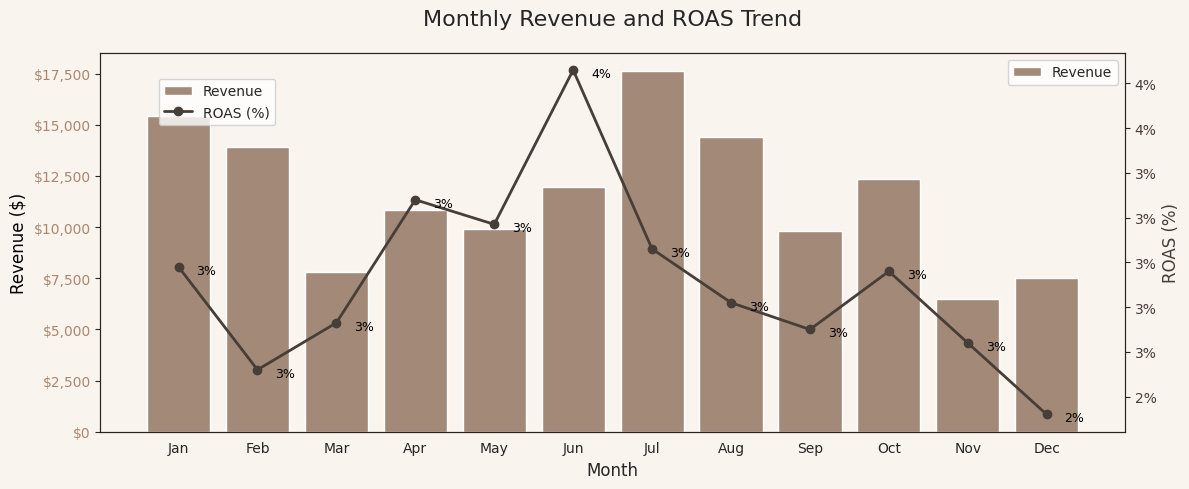

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12, 5),facecolor='#faf4ef') # Set figure size for better readability

# --- Set Font Family ---
# Try to use 'Inter' if available. Provide common fallbacks.
# You might need to install 'Inter' font on your system for it to work.
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['font.size'] = 10 # You can also adjust the default font size globally

# Create the first axis for Revenue (bars)
ax1 = sns.barplot(x='Month', y='Revenue ($)', data=df, color='#ab876f', label='Revenue')
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Revenue ($)", color='#ab876f', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#ab876f')
ax1.set_facecolor('#faf4ef')

# Format Revenue Y-axis to display as currency
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Create the second axis for ROAS (line)
ax2 = ax1.twinx() # Create a twin axis that shares the same x-axis
ax2.plot(df['Month'], df['ROAS'], color='#473e37', marker='o', linewidth=2, label='ROAS (%)')
ax2.set_ylabel("ROAS (%)", color='#473e37', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#473e37')

# Format ROAS Y-axis to display as percentage
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}%'))

# Add a title to the chart
plt.title("Monthly Revenue and ROAS Trend", fontsize=16, pad=20)

# Add a legend for both lines/bars
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Add data labels for ROAS (optional, but good for executives)
for i, roas_val in enumerate(df['ROAS']):
    ax2.annotate(f'{roas_val:.0f}%', (i, roas_val), textcoords="offset points", xytext=(20,-5), ha='center', color='black', fontsize=9)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

## 🧠 Insights

- Which month had the highest ROAS?
- Did high ad spend always lead to more conversions?
- Where could the business cut costs without hurting revenue?

These insights help prioritize marketing strategy and optimize budget allocation.

---

## ✅ Next Steps

This analysis could easily be expanded to include:

- Multi-channel comparison (SEO vs Social vs Paid Ads)
- Landing page performance
- A/B testing outcomes

You’re now ready to show off your analytical skills for SEO or Marketing Analyst roles!